[**The link for the tutorial**](https://www.youtube.com/watch?v=2JiXktBn_2M)

**Import Dependencies**

In [1]:
import os
import sys
import pickle
import time
import pytz
import datetime
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn
from io import StringIO
from sklearn import metrics 
from matplotlib import pyplot as plt
from imblearn.under_sampling import NearMiss
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier

np.set_printoptions(threshold=sys.maxsize)

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Data Preprocessing**

In [2]:
data_frame = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Content-Based Recommender System Data/Hypothesis Data/data-23-tf-idf-150-feature-final.csv', header=None, sep=',')
# data_frame = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Content-Based Recommender System Data/Sample Data/data-3-journals-similar-tf-idf-value-50-feature.csv', header=None, sep=',')
data_frame.shape

(7897, 1573)

In [3]:
header = []

for i in range(len(data_frame.columns)-1):
  header.append(str(i))

header.append('target')

data_frame.columns = header
print(data_frame.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1563', '1564', '1565', '1566', '1567', '1568', '1569', '1570', '1571',
       'target'],
      dtype='object', length=1573)


In [4]:
data_frame['target'].value_counts()

8     1641
0      763
1      754
4      639
2      599
5      595
3      536
6      525
7      500
10     464
9      444
11     437
Name: target, dtype: int64

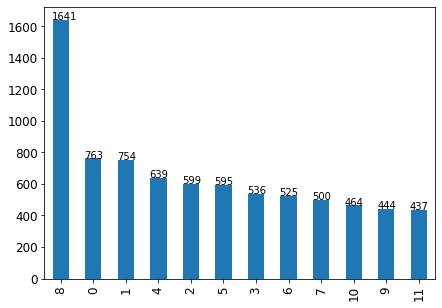

In [5]:
ax = data_frame['target'].value_counts().plot(kind='bar', figsize=(7,5), fontsize=12);
ax.set_alpha(0.8)

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, i.get_height(), fontsize=10)

In [6]:
data_labels = data_frame['target']
data_features = data_frame.drop('target',axis=1)

near_miss = NearMiss(version=2)
x_undersampled, y_undersampled = near_miss.fit_sample(data_features, data_labels)

print(x_undersampled.shape)
print(y_undersampled.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

(5244, 1572)
(5244,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [7]:
data_features_df = pd.DataFrame(data = x_undersampled[0:,0:], 
                                index = [i for i in range(x_undersampled.shape[0])],
                                columns = [str(i) for i in range(x_undersampled.shape[1])])

data_labels_df = pd.DataFrame(data = y_undersampled[0:], 
                                index = [i for i in range(y_undersampled.shape[0])],
                                columns = ['target'])

data_frame_undersampled = data_features_df.join(data_labels_df)
data_frame_undersampled.shape

(5244, 1573)

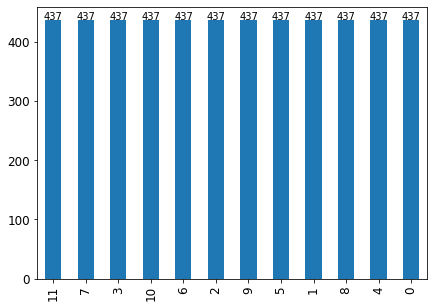

In [8]:
ax = data_frame_undersampled['target'].value_counts().plot(kind='bar', figsize=(7,5), fontsize=12);
ax.set_alpha(0.8)

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, i.get_height(), fontsize=10)

In [9]:
data_frame_shuffled_once = data_frame_undersampled.sample(frac=1)
data_frame_shuffled_twice = data_frame_shuffled_once.sample(frac=1)
data_frame_shuffled_twice.sample(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,target
2028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005575,0.0,0.0,0.0,0.0,0.0,0.0,-0.005575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [10]:
target_counts = data_frame['target'].value_counts()
num_labels = target_counts.shape[0]
num_features = data_frame.shape[1] - 1
num_epoch = 1000
num_k_splits = 10
learning_rate = 0.0001

**Helper Functions**

In [11]:
def to_onehot(y):
  data = np.zeros((num_labels))
  data[y] = 1
  return data

In [12]:
def to_label_list(results):
  label_list = []

  for result in results:
    prediction_label = np.argmax(result)
    label_list.append(prediction_label)
  
  return label_list

In [13]:
def get_accuracy(labels, predictions):
  test_batch_size = predictions.shape[0]
  total_correct_prediction = np.sum(np.argmax(predictions, axis=1) == np.argmax(labels, axis=1))
  accuracy = 100.0 * total_correct_prediction / test_batch_size  
  
  return accuracy

In [14]:
def get_fmeasure(labels, predictions):
  
  fmeasures = {}

  for i in range(num_labels):
    fmeasure_data_dict = {
      "gi": 0,
      "pi_intersect_gi": 0,
    }

    fmeasures[str(i)] = fmeasure_data_dict 
    fmeasure_data_dict = {}

  for i in range(len(labels)):
    label = labels[i]
    prediction = predictions[i]
    fmeasures[str(label)]['gi'] += 1

    if prediction == label:
      fmeasures[str(label)]['pi_intersect_gi'] += 1
  
  total_fmeasure_score = 0

  for i in range(num_labels):
    fmeasure_data = fmeasures[str(i)]
    
    gi = fmeasure_data['gi']
    pi_intersect_gi = fmeasure_data['pi_intersect_gi']
    
    fmeasure_score = (2 * pi_intersect_gi)/(2 * gi)

    # print('i: ', i)
    # print('pi_intersect_gi: ', pi_intersect_gi)
    # print('gi: ', gi)
    # print('fmeasure_score: ', fmeasure_score)

    total_fmeasure_score += fmeasure_score

  fmeasure_score = total_fmeasure_score / num_labels

  return fmeasure_score



Fold: 1




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


test_accuracy:  79.42857142857143
test_fmeasure:  0.7944415081042987


confusion matrix


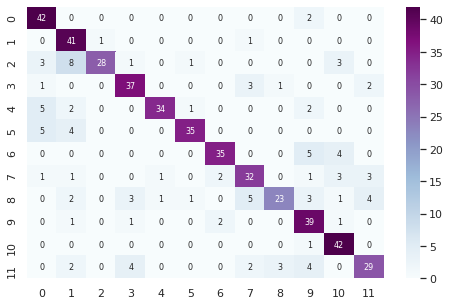

execution time: 4.995274349053701 minutes
finished at:  09:18:01.297627


In [15]:
data_labels = data_frame_shuffled_twice['target'].to_numpy()
data_features = data_frame_shuffled_twice.drop('target',axis=1).to_numpy()

fold_counter = 1
strat_kfold = StratifiedKFold(n_splits= num_k_splits)

for train_index, test_index in strat_kfold.split(data_features, data_labels):
  
  start_time = time.time()

  print("\n==================================\n")
  print("Fold: %d" % fold_counter)
  print("\n")
  
  kfold_train_features = data_features[train_index]
  kfold_train_labels = data_labels[train_index]

  kfold_test_features = data_features[test_index]
  kfold_test_labels = data_labels[test_index]
  kfold_test_labels_onehot_encoded = np.array([to_onehot(label) for label in kfold_test_labels])

  classifier = SGDClassifier(loss="log",penalty="l2",n_iter_no_change=num_epoch,alpha=learning_rate)
  model = classifier.fit(kfold_train_features, kfold_train_labels)

  test_prediction = model.predict(kfold_test_features)
  test_prediction_proba = model.predict_proba(kfold_test_features)

  test_accuracy = get_accuracy(kfold_test_labels_onehot_encoded, test_prediction_proba)
  print('test_accuracy: ', test_accuracy)

  data_test_label_list = to_label_list(kfold_test_labels_onehot_encoded)
  test_predictions_label_list = to_label_list(test_prediction_proba)
  test_fmeasure = get_fmeasure(data_test_label_list, test_predictions_label_list)
  print('test_fmeasure: ', test_fmeasure)
  print("\n")
  
  # classification report
  # test_classification_report = classification_report(kfold_test_labels, test_prediction)
  # print('classification report')
  # print(test_classification_report)

  test_confusion_matrix = confusion_matrix(kfold_test_labels, test_prediction)
  confusion_matrix_df = pd.DataFrame(test_confusion_matrix, range(num_labels), range(num_labels))
  
  plt.figure(figsize=(8,5))
  sn.set(font_scale=1.0)
  sn.heatmap(confusion_matrix_df, annot=True, fmt='g', cmap="BuPu", annot_kws={"size": 8}) 

  print('confusion matrix')
  plt.show()

  # print('model.classes_: ', model.classes_)
  # print('model.coef_: ', model.coef_)
  # print('model.intercept_: ', model.intercept_)
  # print('model.n_iter_: ', model.n_iter_)

  execution_time = (time.time() - start_time)/60
  now = datetime.datetime.now(pytz.timezone('Asia/Jakarta')).time()
  print("execution time: %s minutes" % execution_time)
  print("finished at: ", now)

  model_name = 'model_sastrawi_{}.pkl'.format(fold_counter)
  pickle.dump(model, open(model_name,'wb'))

  fold_counter += 1